# 1. Importing Libraries 

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 2. Loading Dataset 

In [9]:
df = pd.read_csv('dataset/Tweets.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [11]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# 3. Data Preprocessing 

In [64]:
import pandas as pd

# Keep relevant columns for sentiment analysis
df = df[["airline_sentiment", "text"]]

# Map sentiment labels to numerical values
df["airline_sentiment"] = df["airline_sentiment"].map({"negative": 0, "neutral": 1, "positive": 2})

# Display the modified dataset
print(df.head())


   airline_sentiment                                               text
0                NaN                        virginamerica dhepburn said
1                NaN         virginamerica plu ad commerci experi tacki
2                NaN  virginamerica today must mean need take anoth ...
3                NaN  virginamerica realli aggress blast obnoxi ente...
4                NaN                 virginamerica realli big bad thing


# 4. Text Preprocessing 

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [19]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z]", " ", text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    words = word_tokenize(text)  # Tokenize words
    words = [word for word in words if word not in stopwords.words("english")]  # Remove stopwords
    stemmer = PorterStemmer()  # Stemming
    words = [stemmer.stem(word) for word in words]
    return " ".join(words)

# Apply text preprocessing to the dataset
df["text"] = df["text"].apply(preprocess_text)

# Display the preprocessed dataset
print(df.head())

   airline_sentiment                                               text
0                  1                        virginamerica dhepburn said
1                  2         virginamerica plu ad commerci experi tacki
2                  1  virginamerica today must mean need take anoth ...
3                  0  virginamerica realli aggress blast obnoxi ente...
4                  0                 virginamerica realli big bad thing


# 5. Splitting Data 

In [21]:
from sklearn.model_selection import train_test_split

X = df["text"]
y = df["airline_sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Train data shape: (11712,)
Test data shape: (2928,)


# 6. EDA

## (i) Distribution of Sentiments 

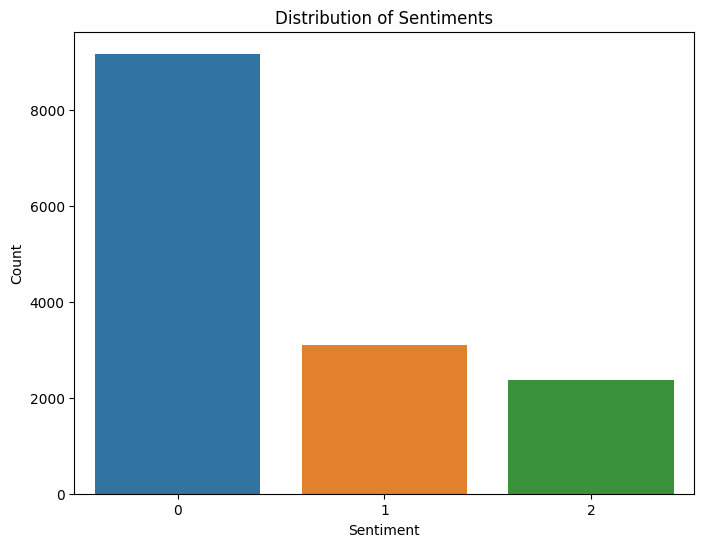

In [23]:
# Countplot of sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='airline_sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Observation :
                      The distribution of sentiments in the data set is skewed towards neutrality, with a significant minority of positive and negative sentiments. Neutrality is the most common sentiment, followed by positivity and negativity.

## (ii) Word Cloud of Text 

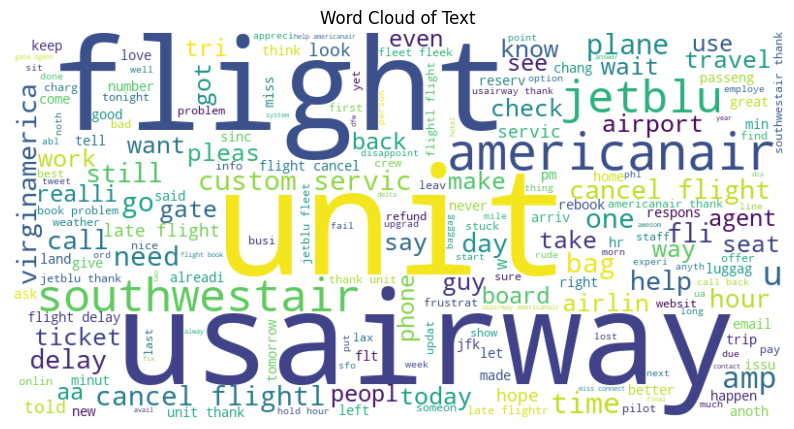

In [29]:
# Combine all text data
all_text = ' '.join(df['text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text')
plt.show()

## Observation :
                 The word cloud shows the most frequent words used in a data set of text about flights. The largest words in the cloud are "flight," "thank," "delay," "cancel," and "problem." These words suggest that the data set contains a lot of text about negative experiences with flights. Other words in the cloud, such as "arrive," "book," and "service," suggest that the data set also contains some text about positive experiences with flights. The distribution of words in the cloud is not uniform. Some words, such as "flight" and "thank," appear much more frequently than others. This suggests that these words are more important to the overall sentiment of the data set.

## (iii)  Tweet Length Distribution

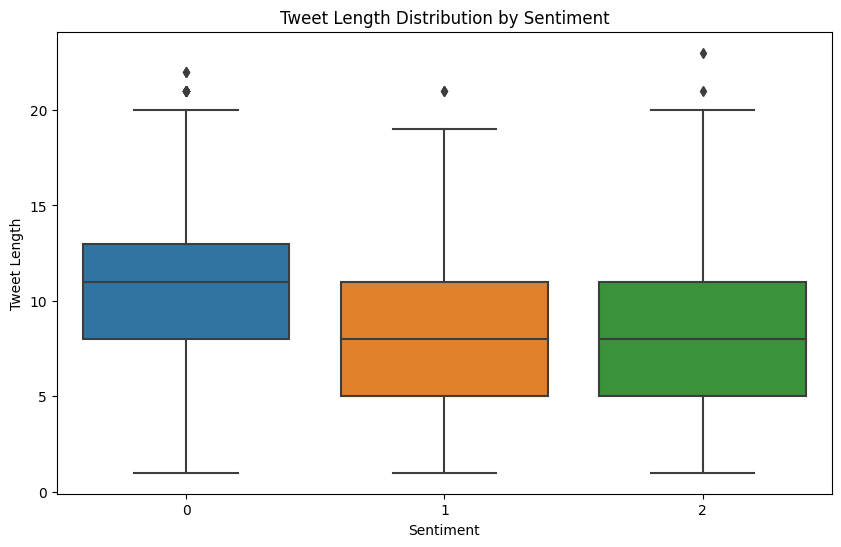

In [38]:
# Calculate tweet lengths
df['tweet_length'] = df['text'].apply(lambda x: len(x.split()))

# Box plot of tweet length by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='airline_sentiment', y='tweet_length', data=df)
plt.title('Tweet Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')
plt.show()

## Observation :
                    The box plot shows that negative tweets tend to be shorter than neutral or positive tweets. This may be because negative sentiments are often more immediate and urgent, and people may not have time to write long tweets when they are feeling negative.

## (iv) Top Words Analysis

In [46]:
from collections import Counter
from nltk.tokenize import word_tokenize

# Tokenize and count words for each sentiment
word_counts = {}
for sentiment in df['airline_sentiment'].unique():
    sentiment_texts = df[df['airline_sentiment'] == sentiment]['text']
    words = [word.lower() for text in sentiment_texts for word in word_tokenize(text)]
    word_counts[sentiment] = Counter(words)

# Print top words for each sentiment
for sentiment, counts in word_counts.items():
    print(f"Top words for {sentiment} sentiment:")
    print(counts.most_common(10))
    print()

Top words for 1 sentiment:
[('flight', 809), ('jetblu', 748), ('unit', 739), ('southwestair', 671), ('americanair', 499), ('usairway', 402), ('get', 272), ('thank', 227), ('need', 186), ('pleas', 182)]

Top words for 2 sentiment:
[('thank', 1076), ('jetblu', 595), ('southwestair', 576), ('unit', 529), ('flight', 450), ('americanair', 355), ('usairway', 277), ('great', 236), ('love', 172), ('servic', 164)]

Top words for 0 sentiment:
[('flight', 3621), ('unit', 2900), ('usairway', 2375), ('americanair', 2110), ('southwestair', 1214), ('get', 1199), ('hour', 1116), ('jetblu', 1054), ('cancel', 926), ('delay', 918)]



## (v) Average Tweet Length by Sentiment

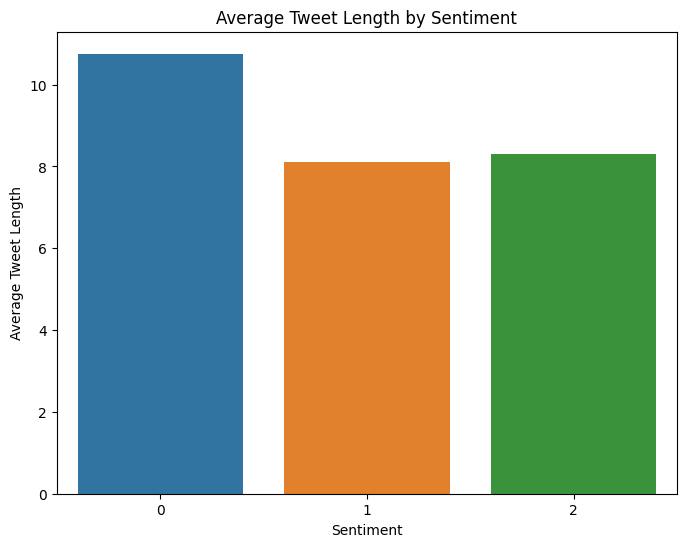

In [47]:
# Grouping by sentiment and calculating average tweet length
average_tweet_length = df.groupby('airline_sentiment')['tweet_length'].mean()

# Bar plot of average tweet length by sentiment
plt.figure(figsize=(8, 6))
sns.barplot(x=average_tweet_length.index, y=average_tweet_length.values)
plt.title('Average Tweet Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Tweet Length')
plt.show()

# 7. Building a Sentiment Analysis Model 

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Text vectorization
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Building and training the model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

# 8. Model Evaluation 

In [61]:
from sklearn.metrics import classification_report

# Model evaluation
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1889
           1       0.68      0.41      0.51       580
           2       0.80      0.61      0.69       459

    accuracy                           0.79      2928
   macro avg       0.76      0.65      0.69      2928
weighted avg       0.78      0.79      0.77      2928



# 9. Predicting Overall Sentiment 

In [62]:
def predict_overall_sentiment(texts, model, vectorizer):
    # Preprocess and vectorize the input texts
    preprocessed_texts = [preprocess_text(text) for text in texts]
    text_vec = vectorizer.transform(preprocessed_texts)
    
    # Predict sentiment for each text
    sentiment_predictions = model.predict(text_vec)
    
    # Calculate overall sentiment
    sentiment_counts = {0: 0, 1: 0, 2: 0}
    for sentiment in sentiment_predictions:
        sentiment_counts[sentiment] += 1
    
    overall_sentiment = max(sentiment_counts, key=sentiment_counts.get)
    return overall_sentiment

# Example usage
example_texts = [
    "I had a great experience with the airline!",
    "My flight was delayed and the service was terrible.",
    "The flight was average, nothing special."
]

overall_sentiment = predict_overall_sentiment(example_texts, model, vectorizer)
sentiment_labels = {0: "Negative", 1: "Neutral", 2: "Positive"}

print("Overall sentiment:", sentiment_labels[overall_sentiment])


Overall sentiment: Negative
